In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn")

In [ ]:
# La idea de la estrategia es short cuando corta la upper band y cerrar la posición cuando corta
# hacia abajo la MA_20 y long cuando corta la lower band y cerrar posición cuando corta hacia arriba
# la MA_20

In [133]:
data = pd.read_csv("/Users/maxibertonalbornoz/Documents/Python/Udemy/Algorithmic Trading A-Z with Python and ML/Part3_Materials/intraday.csv", parse_dates=["time"], index_col="time")
data

,price
time,
2018-01-01 22:00:00+00:00,1.201205
2018-01-02 04:00:00+00:00,1.207055
2018-01-02 10:00:00+00:00,1.204440
2018-01-02 16:00:00+00:00,1.205800
2018-01-02 22:00:00+00:00,1.204690
...,...
2019-12-29 22:00:00+00:00,1.119920
2019-12-30 04:00:00+00:00,1.119940
2019-12-30 10:00:00+00:00,1.120095


In [103]:
SMA = 58
dev = 1

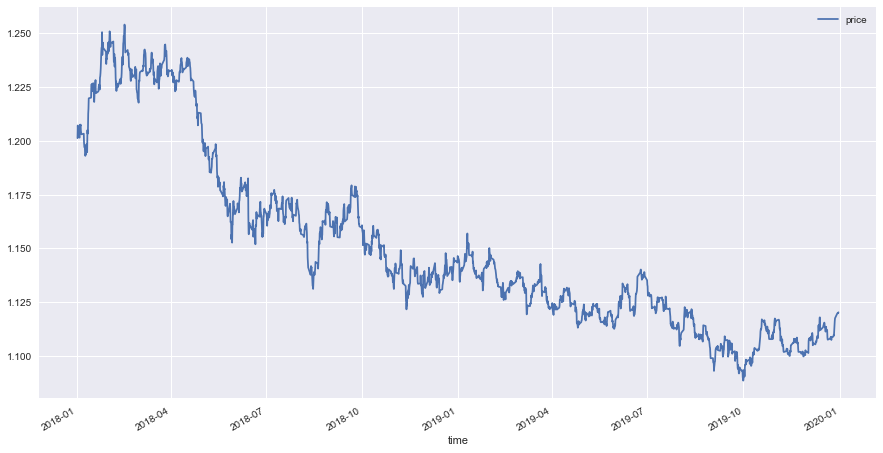

In [134]:
data.plot(figsize=(15,8))
plt.show()

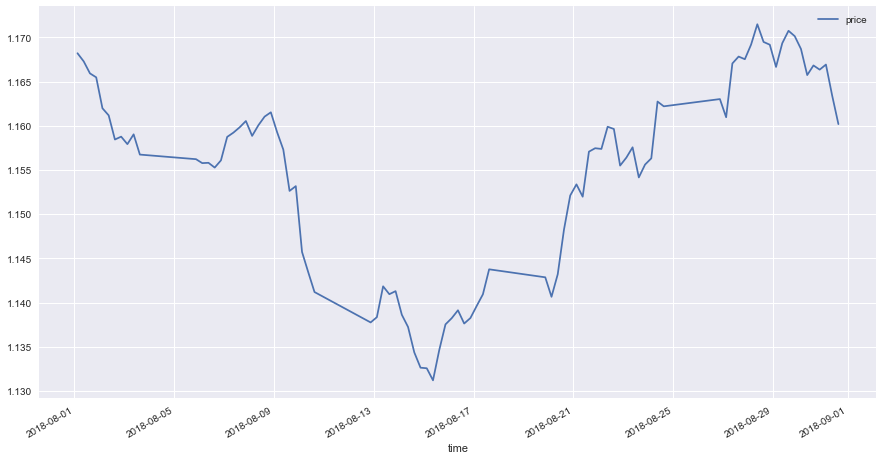

In [135]:
data["2018-08"].plot(figsize=(15,8))

In [136]:
data["returns"] = np.log(data.price.div(data.price.shift(periods=1)))
data

,price,returns
time,,
2018-01-01 22:00:00+00:00,1.201205,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


In [137]:
data["SMA"] = data.price.rolling(window=SMA).mean()
data

,price,returns,SMA
time,,,
2018-01-01 22:00:00+00:00,1.201205,NaN,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,NaN
2018-01-02 22:00:00+00:00,1.204690,-0.000921,NaN
...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111350
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111591
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111843


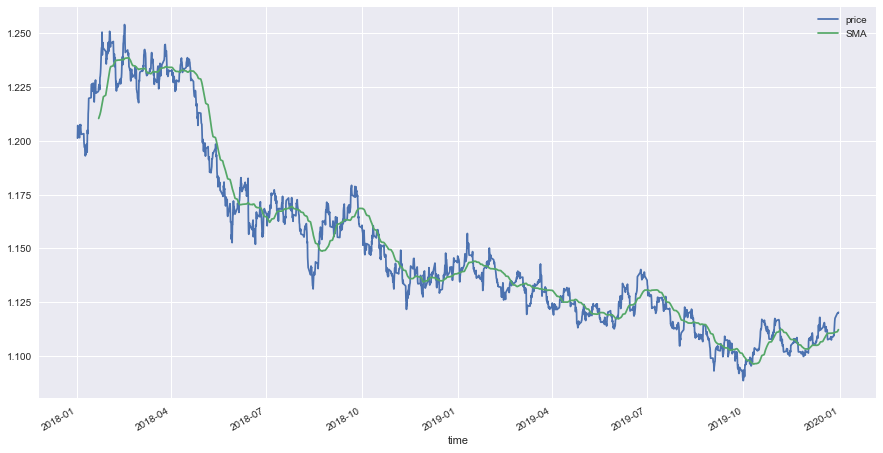

In [138]:
data[["price", "SMA"]].plot(figsize=(15,8))
plt.show()

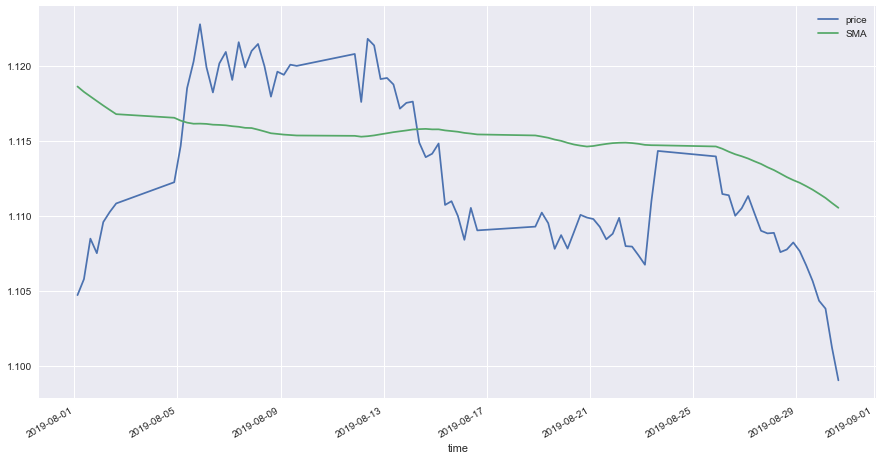

In [139]:
data.loc["2019-08", ["price", "SMA"]].plot(figsize=(15,8))
plt.show()

In [140]:

data["Lower"] = data.SMA - data.price.rolling(window=SMA).std().mul(dev)
data["Upper"] = data.SMA + data.price.rolling(window=SMA).std().mul(dev)
data.dropna(inplace=True)
data

,price,returns,SMA,Lower,Upper
time,,,,,
2018-01-22 04:00:00+00:00,1.224950,0.001675,1.210331,1.198529,1.222133
2018-01-22 10:00:00+00:00,1.225370,0.000343,1.210748,1.198848,1.222648
2018-01-22 16:00:00+00:00,1.226135,0.000624,1.211077,1.199018,1.223136
2018-01-22 22:00:00+00:00,1.225780,-0.000290,1.211445,1.199267,1.223623
2018-01-23 04:00:00+00:00,1.223765,-0.001645,1.211755,1.199495,1.224015
...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111350,1.107982,1.114718
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111591,1.108116,1.115065
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111843,1.108291,1.115395


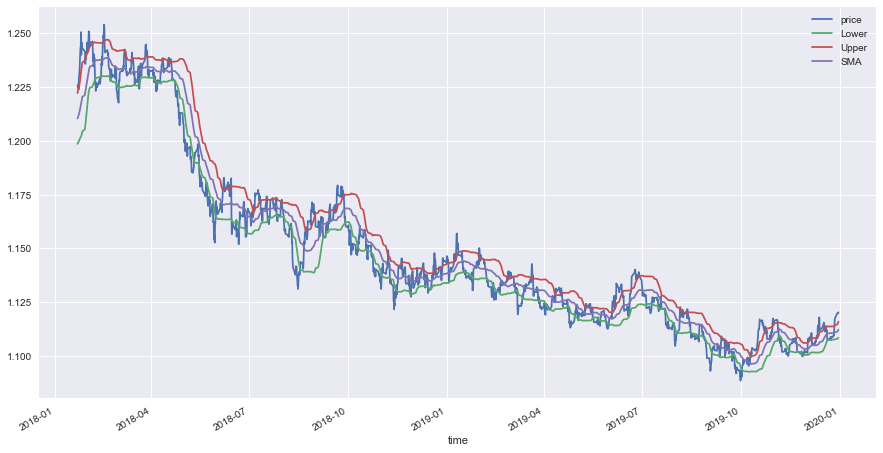

In [141]:
data[["price", "Lower", "Upper", "SMA"]].plot(figsize=(15,8))
plt.show()

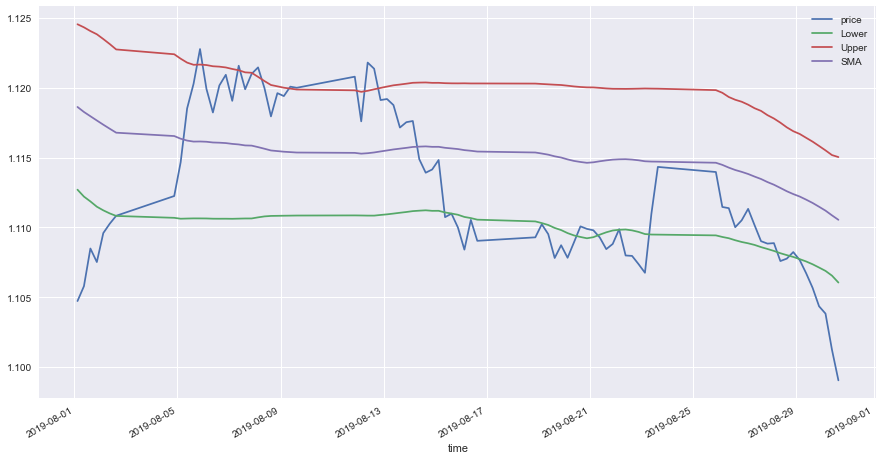

In [142]:
data.loc["2019-08", ["price", "Lower", "Upper", "SMA"]].plot(figsize=(15,8))
plt.show()

In [143]:
data["distance"] = np.sign(data.price - data.SMA)
data

,price,returns,SMA,Lower,Upper,distance
time,,,,,,
2018-01-22 04:00:00+00:00,1.224950,0.001675,1.210331,1.198529,1.222133,1.0
2018-01-22 10:00:00+00:00,1.225370,0.000343,1.210748,1.198848,1.222648,1.0
2018-01-22 16:00:00+00:00,1.226135,0.000624,1.211077,1.199018,1.223136,1.0
2018-01-22 22:00:00+00:00,1.225780,-0.000290,1.211445,1.199267,1.223623,1.0
2018-01-23 04:00:00+00:00,1.223765,-0.001645,1.211755,1.199495,1.224015,1.0
...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111350,1.107982,1.114718,1.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111591,1.108116,1.115065,1.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111843,1.108291,1.115395,1.0


In [144]:
data["position"] = np.where(data.price < data.Lower, 1, np.nan)
data["position"] = np.where(data.price > data.Upper, -1, data["position"])

In [145]:
data

,price,returns,SMA,Lower,Upper,distance,position
time,,,,,,,
2018-01-22 04:00:00+00:00,1.224950,0.001675,1.210331,1.198529,1.222133,1.0,-1.0
2018-01-22 10:00:00+00:00,1.225370,0.000343,1.210748,1.198848,1.222648,1.0,-1.0
2018-01-22 16:00:00+00:00,1.226135,0.000624,1.211077,1.199018,1.223136,1.0,-1.0
2018-01-22 22:00:00+00:00,1.225780,-0.000290,1.211445,1.199267,1.223623,1.0,-1.0
2018-01-23 04:00:00+00:00,1.223765,-0.001645,1.211755,1.199495,1.224015,1.0,NaN
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111350,1.107982,1.114718,1.0,-1.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111591,1.108116,1.115065,1.0,-1.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111843,1.108291,1.115395,1.0,-1.0


In [146]:
data["position"] = np.where(data.distance * data.distance.shift(periods=1) < 0, 0, data["position"])
data

,price,returns,SMA,Lower,Upper,distance,position
time,,,,,,,
2018-01-22 04:00:00+00:00,1.224950,0.001675,1.210331,1.198529,1.222133,1.0,-1.0
2018-01-22 10:00:00+00:00,1.225370,0.000343,1.210748,1.198848,1.222648,1.0,-1.0
2018-01-22 16:00:00+00:00,1.226135,0.000624,1.211077,1.199018,1.223136,1.0,-1.0
2018-01-22 22:00:00+00:00,1.225780,-0.000290,1.211445,1.199267,1.223623,1.0,-1.0
2018-01-23 04:00:00+00:00,1.223765,-0.001645,1.211755,1.199495,1.224015,1.0,NaN
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111350,1.107982,1.114718,1.0,-1.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111591,1.108116,1.115065,1.0,-1.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111843,1.108291,1.115395,1.0,-1.0


In [147]:
data.position = data.position.ffill()
data.position = data.position.fillna(0)
data

,price,returns,SMA,Lower,Upper,distance,position
time,,,,,,,
2018-01-22 04:00:00+00:00,1.224950,0.001675,1.210331,1.198529,1.222133,1.0,-1.0
2018-01-22 10:00:00+00:00,1.225370,0.000343,1.210748,1.198848,1.222648,1.0,-1.0
2018-01-22 16:00:00+00:00,1.226135,0.000624,1.211077,1.199018,1.223136,1.0,-1.0
2018-01-22 22:00:00+00:00,1.225780,-0.000290,1.211445,1.199267,1.223623,1.0,-1.0
2018-01-23 04:00:00+00:00,1.223765,-0.001645,1.211755,1.199495,1.224015,1.0,-1.0
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111350,1.107982,1.114718,1.0,-1.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111591,1.108116,1.115065,1.0,-1.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111843,1.108291,1.115395,1.0,-1.0


In [148]:
data.position.value_counts()

 1.0    899
-1.0    618
 0.0    496
Name: position, dtype: int64

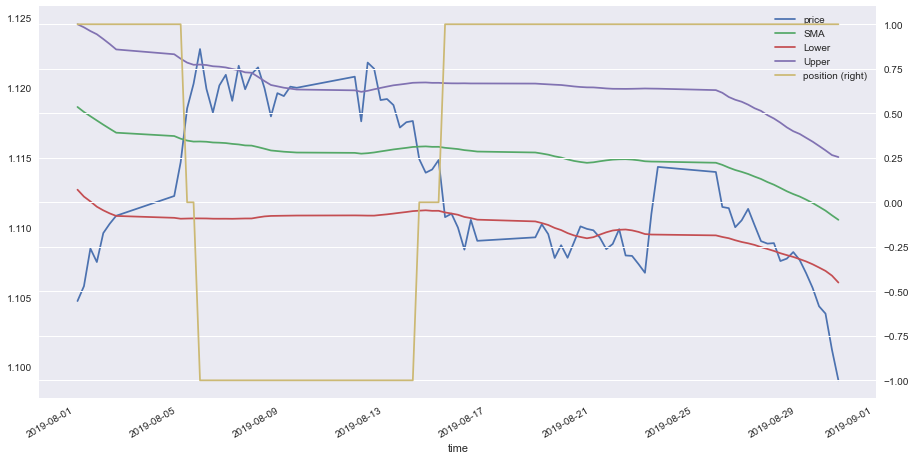

In [149]:
data.loc["2019-08",["price", "SMA", "Lower", "Upper", "position"]].plot(figsize=(15,8), secondary_y="position")
plt.show()

In [150]:
data["strategy"] = data.position.shift(periods=1).mul(data.returns)

In [151]:
data["c_returns"] = data.returns.cumsum().apply(np.exp)
data["c_strategy"] = data.strategy.cumsum().apply(np.exp)
data.dropna(inplace=True)
data

,price,returns,SMA,Lower,Upper,distance,position,strategy,c_returns,c_strategy
time,,,,,,,,,,
2018-01-22 10:00:00+00:00,1.225370,0.000343,1.210748,1.198848,1.222648,1.0,-1.0,-0.000343,1.002020,0.999657
2018-01-22 16:00:00+00:00,1.226135,0.000624,1.211077,1.199018,1.223136,1.0,-1.0,-0.000624,1.002645,0.999034
2018-01-22 22:00:00+00:00,1.225780,-0.000290,1.211445,1.199267,1.223623,1.0,-1.0,0.000290,1.002355,0.999323
2018-01-23 04:00:00+00:00,1.223765,-0.001645,1.211755,1.199495,1.224015,1.0,-1.0,0.001645,1.000707,1.000968
2018-01-23 10:00:00+00:00,1.229295,0.004509,1.212179,1.199743,1.224614,1.0,-1.0,-0.004509,1.005229,0.996465
...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111350,1.107982,1.114718,1.0,-1.0,-0.002092,0.915790,1.250614
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111591,1.108116,1.115065,1.0,-1.0,-0.000018,0.915807,1.250592
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111843,1.108291,1.115395,1.0,-1.0,-0.000138,0.915933,1.250419


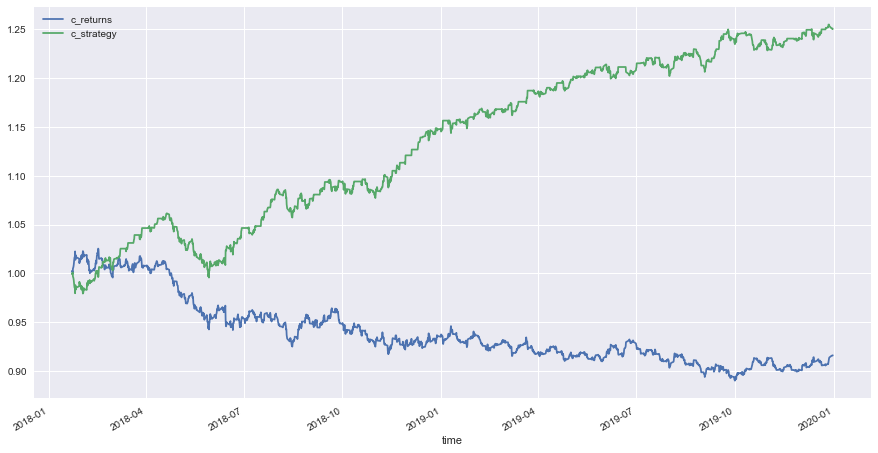

In [152]:
data[["c_returns", "c_strategy"]].plot(figsize=(15,8))
plt.show()

In [153]:
data

,price,returns,SMA,Lower,Upper,distance,position,strategy,c_returns,c_strategy
time,,,,,,,,,,
2018-01-22 10:00:00+00:00,1.225370,0.000343,1.210748,1.198848,1.222648,1.0,-1.0,-0.000343,1.002020,0.999657
2018-01-22 16:00:00+00:00,1.226135,0.000624,1.211077,1.199018,1.223136,1.0,-1.0,-0.000624,1.002645,0.999034
2018-01-22 22:00:00+00:00,1.225780,-0.000290,1.211445,1.199267,1.223623,1.0,-1.0,0.000290,1.002355,0.999323
2018-01-23 04:00:00+00:00,1.223765,-0.001645,1.211755,1.199495,1.224015,1.0,-1.0,0.001645,1.000707,1.000968
2018-01-23 10:00:00+00:00,1.229295,0.004509,1.212179,1.199743,1.224614,1.0,-1.0,-0.004509,1.005229,0.996465
...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111350,1.107982,1.114718,1.0,-1.0,-0.002092,0.915790,1.250614
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111591,1.108116,1.115065,1.0,-1.0,-0.000018,0.915807,1.250592
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111843,1.108291,1.115395,1.0,-1.0,-0.000138,0.915933,1.250419


In [154]:
pct = 0.00007

In [155]:
data["trades"] = data.position.diff().fillna(0).abs()
data

,price,returns,SMA,Lower,Upper,distance,position,strategy,c_returns,c_strategy,trades
time,,,,,,,,,,,
2018-01-22 10:00:00+00:00,1.225370,0.000343,1.210748,1.198848,1.222648,1.0,-1.0,-0.000343,1.002020,0.999657,0.0
2018-01-22 16:00:00+00:00,1.226135,0.000624,1.211077,1.199018,1.223136,1.0,-1.0,-0.000624,1.002645,0.999034,0.0
2018-01-22 22:00:00+00:00,1.225780,-0.000290,1.211445,1.199267,1.223623,1.0,-1.0,0.000290,1.002355,0.999323,0.0
2018-01-23 04:00:00+00:00,1.223765,-0.001645,1.211755,1.199495,1.224015,1.0,-1.0,0.001645,1.000707,1.000968,0.0
2018-01-23 10:00:00+00:00,1.229295,0.004509,1.212179,1.199743,1.224614,1.0,-1.0,-0.004509,1.005229,0.996465,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111350,1.107982,1.114718,1.0,-1.0,-0.002092,0.915790,1.250614,0.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111591,1.108116,1.115065,1.0,-1.0,-0.000018,0.915807,1.250592,0.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111843,1.108291,1.115395,1.0,-1.0,-0.000138,0.915933,1.250419,0.0


In [156]:
data.trades.value_counts()

0.0    1874
1.0     138
Name: trades, dtype: int64

In [157]:
data["strategy_net"] = data.strategy.sub(data.trades.mul(pct))
data["c_strategy_net"] = data.strategy_net.cumsum().apply(np.exp)

In [158]:
data

,price,returns,SMA,Lower,Upper,distance,position,strategy,c_returns,c_strategy,trades,strategy_net,c_strategy_net
time,,,,,,,,,,,,,
2018-01-22 10:00:00+00:00,1.225370,0.000343,1.210748,1.198848,1.222648,1.0,-1.0,-0.000343,1.002020,0.999657,0.0,-0.000343,0.999657
2018-01-22 16:00:00+00:00,1.226135,0.000624,1.211077,1.199018,1.223136,1.0,-1.0,-0.000624,1.002645,0.999034,0.0,-0.000624,0.999034
2018-01-22 22:00:00+00:00,1.225780,-0.000290,1.211445,1.199267,1.223623,1.0,-1.0,0.000290,1.002355,0.999323,0.0,0.000290,0.999323
2018-01-23 04:00:00+00:00,1.223765,-0.001645,1.211755,1.199495,1.224015,1.0,-1.0,0.001645,1.000707,1.000968,0.0,0.001645,1.000968
2018-01-23 10:00:00+00:00,1.229295,0.004509,1.212179,1.199743,1.224614,1.0,-1.0,-0.004509,1.005229,0.996465,0.0,-0.004509,0.996465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111350,1.107982,1.114718,1.0,-1.0,-0.002092,0.915790,1.250614,0.0,-0.002092,1.238592
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111591,1.108116,1.115065,1.0,-1.0,-0.000018,0.915807,1.250592,0.0,-0.000018,1.238569
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111843,1.108291,1.115395,1.0,-1.0,-0.000138,0.915933,1.250419,0.0,-0.000138,1.238398


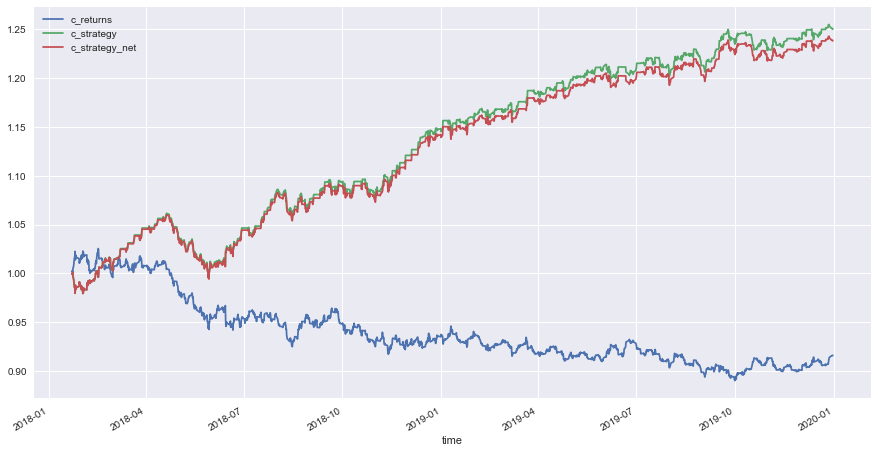

In [159]:
data[["c_returns", "c_strategy", "c_strategy_net"]].plot(figsize=(15,8))
plt.show()

In [160]:
data[["returns", "strategy_net"]].mean().mul(4*252)

returns        -0.044716
strategy_net    0.107006
dtype: float64

In [161]:
data[["returns", "strategy_net"]].std().mul(np.sqrt(4*252))

returns         0.059364
strategy_net    0.052395
dtype: float64